In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

from spectrogram_class import spectrogram


# Music transcription

This is the notebook for music transcription project for EDA (exploratory data analysis). Throughout the project, we have utilized 2 datasets:

* [OrchideaSOL](https://arxiv.org/abs/2007.00763)
* [MusicNet](https://zenodo.org/record/5120004#.YuqNuNLMKdw).

---

The description of OrchideaSOL is as follows:

> The OrchideaSOL dataset contains the raw audio data (in wav format) for orchetral musical instrument. The dataset contains 11GB of audio files with different variation of techniques, dynamics and etc. Each audio files contain single instrument, single note of sounds. The length of the audio files range from 5 seconds to 20+ seconds, and each audio files is clearly labeled with the instrument and notes, which is our desired labels in the supervised learning models.

---

The description of the MusicNet dataset is as follows:

> MusicNet is a dataset containing over 300 audio files of classical music. The dataset contains 23GB of classical music played by 11 different instruments. This is a more complicated dataset, ranging from 3 minutes to 20+ minutes. Each note is labeled by the starting and ending time by the position in sample rate, including the instrument played. I was estimated that the error of the labeling is around 4%.

## Meta data (OrchideaSOL)

The main dataset, other than the raw audio files, we are going to explore is the metadata dataframe. Let's first explore the Orchetral dataset.

In [2]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')
meta_df.head(2)

,Path,Family (abbr.),Family (in full),Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID (if applicable),Dynamics,Dynamics ID (if applicable),Instance ID,Mute (abbr.),Mute (in full),String ID (if applicable),Needed digital retuning,Fold
0,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,f,3.0,0.0,S,Sordina,NaN,False,2
1,Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...,Brass,Brass,BTb,Bass Tuba,ord,ordinario,A#0,22.0,p,1.0,0.0,S,Sordina,NaN,True,0


In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13265 entries, 0 to 13264
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Path                         13265 non-null  object 
 1   Family (abbr.)               13265 non-null  object 
 2   Family (in full)             13265 non-null  object 
 3   Instrument (abbr.)           13265 non-null  object 
 4   Instrument (in full)         13265 non-null  object 
 5   Technique (abbr.)            13265 non-null  object 
 6   Technique (in full)          13265 non-null  object 
 7   Pitch                        13265 non-null  object 
 8   Pitch ID (if applicable)     13162 non-null  float64
 9   Dynamics                     13265 non-null  object 
 10  Dynamics ID (if applicable)  12646 non-null  float64
 11  Instance ID                  13262 non-null  float64
 12  Mute (abbr.)                 13265 non-null  object 
 13  Mute (in full)  

In [4]:
meta_df.nunique().sort_values()

Needed digital retuning            2
Fold                               5
Family (abbr.)                     5
Family (in full)                   5
Dynamics ID (if applicable)        5
String ID (if applicable)          6
Dynamics                           7
Mute (abbr.)                       7
Mute (in full)                     7
Instance ID                       13
Instrument (abbr.)                16
Instrument (in full)              16
Technique (in full)               52
Technique (abbr.)                 56
Pitch ID (if applicable)          90
Pitch                            105
Path                           13265
dtype: int64

The Series above represents the number of unique values across all features. From the object types, unique values and intuition, we can conclude that all bu the path to the audio files are categorical features.

In [5]:
# Check for null values
meta_df.isna().sum()

Path                              0
Family (abbr.)                    0
Family (in full)                  0
Instrument (abbr.)                0
Instrument (in full)              0
Technique (abbr.)                 0
Technique (in full)               0
Pitch                             0
Pitch ID (if applicable)        103
Dynamics                          0
Dynamics ID (if applicable)     619
Instance ID                       3
Mute (abbr.)                      0
Mute (in full)                    0
String ID (if applicable)      5749
Needed digital retuning           0
Fold                              0
dtype: int64

The only columns we are interested in are the Path, Instrument and Pitch. We can see that out of all three, only Pitch ID contains numm values. Now let's take a look at what the null values are, represented in pitch.

In [6]:
meta_df['Pitch'].unique()

array(['A#0', 'A#1', 'A#2', 'A#3', 'A#4', 'A0', 'A1', 'A2', 'A3', 'A4',
       'B0', 'B1', 'B2', 'B3', 'C#1', 'C#2', 'C#3', 'C#4', 'C1', 'C2',
       'C3', 'C4', 'D#1', 'D#2', 'D#3', 'D#4', 'D1', 'D2', 'D3', 'D4',
       'E1', 'E2', 'E3', 'E4', 'F#1', 'F#2', 'F#3', 'F#4', 'F1', 'F2',
       'F3', 'F4', 'G#0', 'G#1', 'G#2', 'G#3', 'G#4', 'G1', 'G2', 'G3',
       'G4', 'N', 'C#1_D#1', 'C1_C#1', 'C1_G1', 'D1_D#1', 'D1_F1', 'B4',
       'C#5', 'C5', 'D#5', 'D5', 'E5', 'F5', 'A#5', 'A5', 'B5', 'F#5',
       'G#5', 'G5', 'C#6', 'C6', 'D#6', 'D6', 'E6', 'F#6', 'F6', 'G6',
       'A#6', 'A#7', 'A6', 'A7', 'B6', 'B7', 'C#7', 'C#8', 'C7', 'C8',
       'D#7', 'D7', 'E7', 'F#7', 'F7', 'G#6', 'G#7', 'G7', 'C#3_B5',
       'C#3_C#4', 'C#3_C#5', 'C#3_C#6', 'C#3_D#6', 'C#3_F5', 'C#3_F6',
       'C#3_G#4', 'C#3_G#5'], dtype=object)

In [7]:
# Getting the unique values of Pitch where the Pitch ID are missing.
meta_df[['Pitch', 'Pitch ID (if applicable)']] \
            [meta_df['Pitch ID (if applicable)'].isnull()]['Pitch'].unique()

array(['N', 'C#1_D#1', 'C1_C#1', 'C1_G1', 'D1_D#1', 'D1_F1', 'C#3_B5',
       'C#3_C#4', 'C#3_C#5', 'C#3_C#6', 'C#3_D#6', 'C#3_F5', 'C#3_F6',
       'C#3_G#4', 'C#3_G#5'], dtype=object)

If you are not familiar with music, let me give you some insight (I am either grade 5 or 6 on piano ABRSM, can't remember which since I lost my certificate): 

>> None of the terms make sense to me!

There is no note N in music, nor can you be C1 and C# at the same time! The documentation on OrchideaSOL doesn't include any useful information on the subject either. The only logical way to deal with the null values is to simple drop them.

To justify the decision, let's look at the precentage of the missing values.

In [8]:
# Getting the fractiong of missing values in the Pitch ID feature.
meta_df['Pitch ID (if applicable)'].isnull().sum()/meta_df.shape[0]

0.007764794572182435

It's not even 1% of our data, we don't lose much training information from losing these unexplanable samples notes.

## OrchideaSOL instrument analysis

Now that we have an understading of the note missing values, let's have a look at the instruments distribution.

In [9]:
orchidea_instrument = meta_df['Instrument (in full)'].value_counts(normalize=True)
orchidea_instrument

Violin            0.149793
Viola             0.147154
Contrabass        0.123332
Cello             0.120090
Accordion         0.065737
Trombone          0.050509
Trumpet in C      0.044478
French Horn       0.044403
Flute             0.039879
Harp              0.038221
Bass Tuba         0.037693
Clarinet in Bb    0.030607
Alto Saxophone    0.028421
Bassoon           0.026988
Guitar            0.026611
Oboe              0.026084
Name: Instrument (in full), dtype: float64

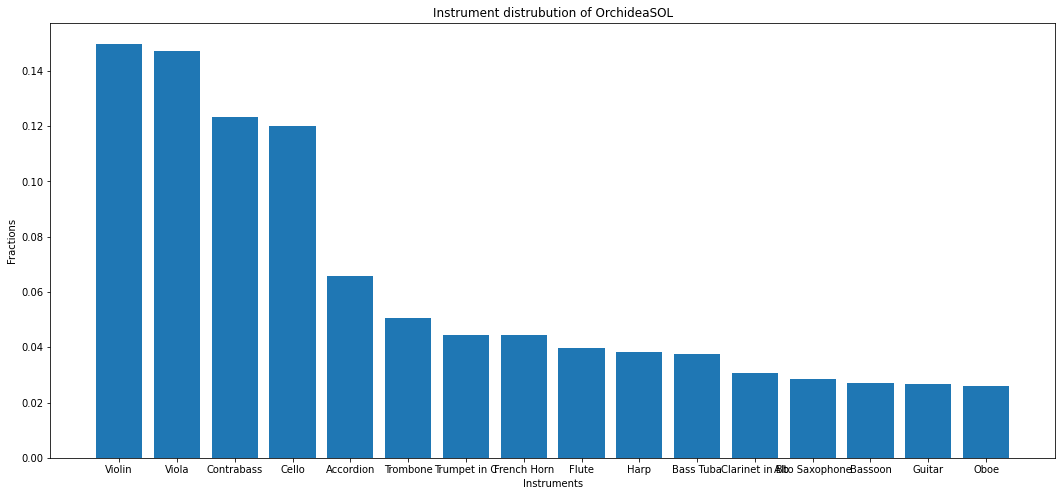

In [10]:
plt.figure(figsize = (18, 8))
plt.bar(orchidea_instrument.index, orchidea_instrument.values)
plt.title('Instrument distrubution of OrchideaSOL')
plt.xlabel('Instruments')
plt.ylabel('Fractions')
plt.show()

We can see that violin, viola, contrabass and cello has more entries comparing to the rest of the instruments.

Since we have some unbalanced data, we can either comtemplate the bias through adjusting the loss function (increasing the penalty for misclassifying minor classes), or creating more data for the minorities through audio file augmentation, more on that in the other notebooks!

## OrchideaSOL instrument/notes analysis

Now that we have a sense of how the instruments distribution looks like, it is also useful to look at the distribution of the instruments corresponding to the notes.

<AxesSubplot:xlabel='Pitch ID (if applicable)', ylabel='Instrument (in full)'>

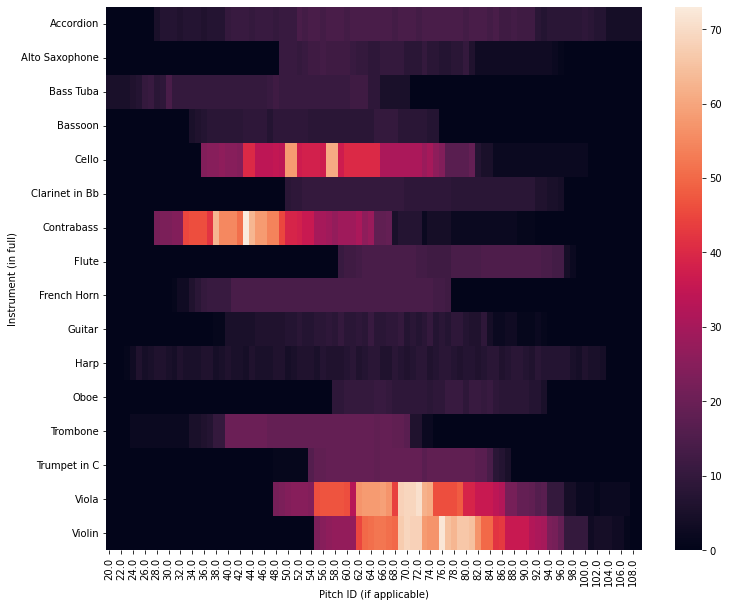

In [11]:
# Creating crosstab for instrument and Pitch ID, 
# which represents the value counts for all instrument/Pitch ID combinations

plt.figure(figsize = (12, 10))
sns.heatmap(pd.crosstab(meta_df['Instrument (in full)'], 
                                meta_df['Pitch ID (if applicable)']))

We can see that the majority of notes for viola and violin distributed in the middle of the note range. Wheareas Cello and Contrabass has distribution shift towards the lower ends of the range. 

It is also useful to note that:
* Accoridian, guitar and harp has lower number of note counts,
* However, their notes are more evenly distributed across the note range.

# MusicNet

Now let's look at the dataset of classical MusicNet

In [12]:
classic_df = pd.read_csv('../data/classic/musicnet_metadata.csv')
classic_df.head(2)

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251


In [13]:
classic_df['composer'].value_counts()

Beethoven    157
Bach          67
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: composer, dtype: int64

<BarContainer object of 10 artists>

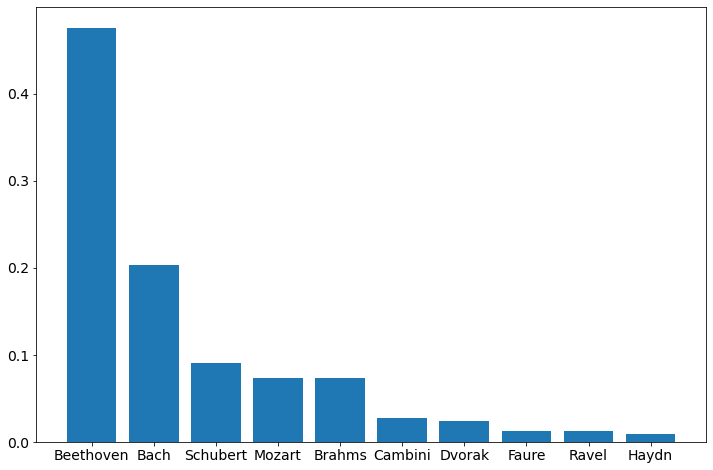

In [29]:
matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize = (12, 8))
plt.bar(classic_df['composer'].value_counts().index, 
                classic_df['composer'].value_counts(normalize=True))

Since we are dealing with classical music, it is no surprise that our composer will be bias towards the big names, Beethoven, Bach, Chopin, the list go on.

However, almost half of our data is composed by Beethoven alone. Does it means that our model is going to produce a better transcription for Beethoven's music? It's hard to say, the reason is as follows:

> Since the ideal model should only be diffentiating the combination of instrument/note pair, the spectrogram should be able to tell if the composer is Beethoven or Bach. Remember, we are using seqencial LSTM/RNN model in our classification, so the only feature the model is going to capture is the preference of notes together, the distance between two notes (tempo) and the combination of sond signature produced by different instrument. Unless their is a claim that supports each composer has their unique preference on sequence of notes, and which instrument should be played together, there is nothing to worry about.

> But, to analyse the sequenctial data of notes and instrument, we need the notes for each time frame, which is why exactly I am doing this project. So this is a classic problem of 'does chicken exist first or the eggs?'.

In conclusion, is there a possibility of bias? Yes.  
Should I spend time analyzing the notes distribution for different composer? Yes.  
Do I have the unbias data to perform the analysis? No.  
Do I have the time to analyze the data? No.  

So at this stages, we are going to trust that the notes distribution for each composer is similar.